Ninfect = 36 36
Ninfect = 62 62
Infect Fit: slope = -0.7575532360739676, intercept = 21.344156568266335, R^2 = 0.3496754864712093
Express Fit: slope = 0.23379687874502833, intercept = 22.125984923548327, R^2 = 0.017285764592665342


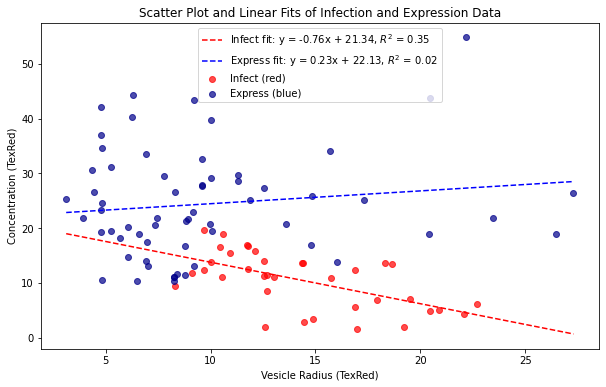

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Load the data from the Excel file
file_path = 'infect-express.xlsx'
sheet_infect = 'infect'
sheet_express = 'express'

# Read the data for the scatter plots
infect_data = pd.read_excel(file_path, sheet_name=sheet_infect)
express_data = pd.read_excel(file_path, sheet_name=sheet_express)

# Extract concentration and radius for infection (red) and expression (blue)
a_conc_infect = infect_data['a_conc_TexRed']
#a_conc_infect = infect_data['Imax-Imin_TexRed']
radius_infect = infect_data['Radius_TexRed']
print('Ninfect =', len(radius_infect), len(a_conc_infect))

a_conc_express = express_data['a_conc_TexRed']
#a_conc_express = express_data['Imax-Imin_TexRed']
radius_express = express_data['Radius_TexRed']
print('Ninfect =', len(radius_express), len(a_conc_express))

# Perform linear regression for the infect (red) and express (blue) data
if len(a_conc_infect) > 1 and len(radius_infect) > 1:
    slope_infect, intercept_infect, r_value_infect, _, _ = linregress(radius_infect, a_conc_infect)
    r_squared_infect = r_value_infect**2  # Calculate R^2
else:
    print("Not enough valid data for infect dataset.")

if len(a_conc_express) > 1 and len(radius_express) > 1:
    slope_express, intercept_express, r_value_express, _, _ = linregress(radius_express, a_conc_express)
    r_squared_express = r_value_express**2  # Calculate R^2
else:
    print("Not enough valid data for express dataset.")

# Print slope, intercept, and R^2 for debugging
print(f'Infect Fit: slope = {slope_infect}, intercept = {intercept_infect}, R^2 = {r_squared_infect}')
print(f'Express Fit: slope = {slope_express}, intercept = {intercept_express}, R^2 = {r_squared_express}')

# Generate data for the linear fits based on the range of infect data, with same number of points for both
min_radius = min(min(radius_infect), min(radius_express))
max_radius = max(max(radius_infect), max(radius_express))
num_points = 100  # Same number of points for both fits

radius_fit_infect = np.linspace(min_radius, max_radius, num_points)
radius_fit_express = np.linspace(min_radius, max_radius, num_points)

infect_fit = slope_infect * radius_fit_infect + intercept_infect
express_fit = slope_express * radius_fit_express + intercept_express

# Plot the scatter plots and fits
plt.figure(figsize=(10, 6))

# Scatter plot and fit for infection (red)
plt.scatter(radius_infect, a_conc_infect, color='red', label='Infect (red)', alpha=0.7)
plt.plot(radius_fit_infect, infect_fit, color='red', linestyle='--', label=f'Infect fit: y = {slope_infect:.2f}x + {intercept_infect:.2f}, $R^2$ = {r_squared_infect:.2f}')

# Scatter plot and fit for expression (blue)
plt.scatter(radius_express, a_conc_express, color='darkblue', label='Express (blue)', alpha=0.7)
plt.plot(radius_fit_express, express_fit, color='blue', linestyle='--', label=f'Express fit: y = {slope_express:.2f}x + {intercept_express:.2f}, $R^2$ = {r_squared_express:.2f}')

# Add labels and title
plt.xlabel('Vesicle Radius (TexRed)')
plt.ylabel('Concentration (TexRed)')
plt.title('Scatter Plot and Linear Fits of Infection and Expression Data')

# Add legend
plt.legend()

# Show the plot
plt.grid(False)
#plt.savefig('radius-infection.svg', format='svg') #Save the figure
plt.show()